<a href="https://colab.research.google.com/github/TanisqSinghal/Data_science_internship/blob/main/Lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
df = sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
df[(df.passengers > 400) & (df.year > 1955) & ((df.month == "Jul") | (df.month == "Aug"))].reset_index(drop="first") # dont make previous indexes col in dataframe

,year,month,passengers
0,1956,Jul,413
1,1956,Aug,405
2,1957,Jul,465
3,1957,Aug,467
4,1958,Jul,491
5,1958,Aug,505
6,1959,Jul,548
7,1959,Aug,559
8,1960,Jul,622
9,1960,Aug,606


In [ ]:
df.shape[0] - df.where(df.passengers > 400).isnull().sum() #subtract passengers where greater then 400

,0
year,28
month,28
passengers,28


In [ ]:
df.month = df.month.str.upper()
df

,year,month,passengers
0,1949,JAN,112
1,1949,FEB,118
2,1949,MAR,132
3,1949,APR,129
4,1949,MAY,121
...,...,...,...
139,1960,AUG,606
140,1960,SEP,508
141,1960,OCT,461
142,1960,NOV,390


In [ ]:
df[df.month.str.contains('N')]

,year,month,passengers
0,1949,JAN,112
5,1949,JUN,135
10,1949,NOV,104
12,1950,JAN,115
17,1950,JUN,149
22,1950,NOV,114
24,1951,JAN,145
29,1951,JUN,178
34,1951,NOV,146
36,1952,JAN,171


In [ ]:
df.passengers.astype('str').str.join(".")

,passengers
0,1.1.2
1,1.1.8
2,1.3.2
3,1.2.9
4,1.2.1
...,...
139,6.0.6
140,5.0.8
141,4.6.1
142,3.9.0


In [ ]:
df.passengers.astype('str').str.join(".").str.contains(".")

,passengers
0,True
1,True
2,True
3,True
4,True
...,...
139,True
140,True
141,True
142,True


In [ ]:
import pandas as pd
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format = '%Y-%b')
df

,year,month,passengers,date
0,1949,JAN,112,1949-01-01
1,1949,FEB,118,1949-02-01
2,1949,MAR,132,1949-03-01
3,1949,APR,129,1949-04-01
4,1949,MAY,121,1949-05-01
...,...,...,...,...
139,1960,AUG,606,1960-08-01
140,1960,SEP,508,1960-09-01
141,1960,OCT,461,1960-10-01
142,1960,NOV,390,1960-11-01


In [ ]:
df['month_num'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['month-name'] = df["date"].dt.month_name()
df

,year,month,passengers,date,month_num,quarter,month-name
0,1949,JAN,112,1949-01-01,1,1,January
1,1949,FEB,118,1949-02-01,2,1,February
2,1949,MAR,132,1949-03-01,3,1,March
3,1949,APR,129,1949-04-01,4,2,April
4,1949,MAY,121,1949-05-01,5,2,May
...,...,...,...,...,...,...,...
139,1960,AUG,606,1960-08-01,8,3,August
140,1960,SEP,508,1960-09-01,9,3,September
141,1960,OCT,461,1960-10-01,10,4,October
142,1960,NOV,390,1960-11-01,11,4,November


In [ ]:
df.dtypes

,0
year,int64
month,object
passengers,int64
date,datetime64[ns]
month_num,int32
quarter,int32
month-name,object


In [ ]:
pivot_df = df.pivot_table(values="passengers", index="year", columns="month",aggfunc="sum")
pivot_df

month,APR,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


In [ ]:
pivot_df.corr(numeric_only=True) #Correlation

month,APR,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
month,,,,,,,,,,,,
APR,1.000000,0.992308,0.990684,0.994752,0.995918,0.994981,0.994910,0.991589,0.998290,0.992867,0.996277,0.995188
AUG,0.992308,1.000000,0.993931,0.995954,0.997479,0.997756,0.997674,0.994852,0.995219,0.997102,0.997429,0.997334
DEC,0.990684,0.993931,1.000000,0.991053,0.991821,0.996202,0.994374,0.990635,0.993936,0.998601,0.997108,0.997680
FEB,0.994752,0.995954,0.991053,1.000000,0.998247,0.994991,0.997296,0.991813,0.995039,0.994475,0.996401,0.995011
JAN,0.995918,0.997479,0.991821,0.998247,1.000000,0.997717,0.998700,0.993215,0.996823,0.995648,0.997920,0.996372
JUL,0.994981,0.997756,0.996202,0.994991,0.997717,1.000000,0.998211,0.991882,0.996357,0.997343,0.998987,0.998808
JUN,0.994910,0.997674,0.994374,0.997296,0.998700,0.998211,1.000000,0.994923,0.995804,0.997113,0.997856,0.998527
MAR,0.991589,0.994852,0.990635,0.991813,0.993215,0.991882,0.994923,1.000000,0.994742,0.994334,0.992312,0.994969
MAY,0.998290,0.995219,0.993936,0.995039,0.996823,0.996357,0.995804,0.994742,1.000000,0.996645,0.997837,0.996724


<Axes: xlabel='month', ylabel='year'>

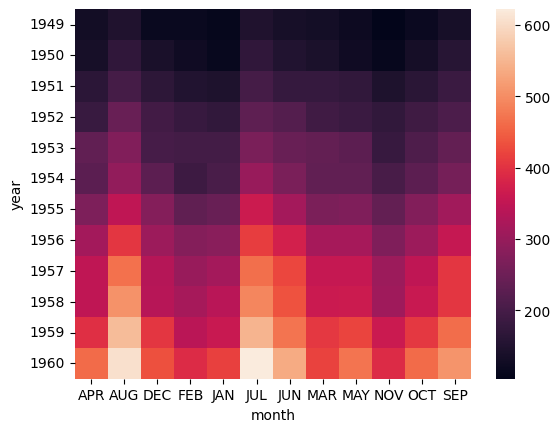

In [ ]:
sns.heatmap(pivot_df)

#JOINTS(COMBINING DATA FRAMES)

In [ ]:
df7 = pd.DataFrame({
    "customer_id" : ['101', '102', '103', '104'],
    'category' : ["cat2", "cat2", "cat1", "cat3"],
    "important" : ["yes", "no", "yes", "yes"],
    "sales" : [123, 52, 214, 663]},index = [0,1,2,3]
                   )
df8 = pd.DataFrame({
    "customer_id" : ["101", "103", "104", "105"],
    "color" : ["yellow", "green", "green", "blue"],
    "distance" : [12,9,44,21],
    "sales" : [123,214,663,331]},index=[4,5,6,7]
                   )
df7

,customer_id,category,important,sales
0,101,cat2,yes,123
1,102,cat2,no,52
2,103,cat1,yes,214
3,104,cat3,yes,663


In [ ]:
df8

,customer_id,color,distance,sales
4,101,yellow,12,123
5,103,green,9,214
6,104,green,44,663
7,105,blue,21,331


In [ ]:
pd.concat([df7,df8], axis=0, sort=False)

,customer_id,category,important,sales,color,distance
0,101,cat2,yes,123,NaN,NaN
1,102,cat2,no,52,NaN,NaN
2,103,cat1,yes,214,NaN,NaN
3,104,cat3,yes,663,NaN,NaN
4,101,NaN,NaN,123,yellow,12.0
5,103,NaN,NaN,214,green,9.0
6,104,NaN,NaN,663,green,44.0
7,105,NaN,NaN,331,blue,21.0


In [ ]:
pd.concat([df7,df8], axis=1, sort=False)

,customer_id,category,important,sales,customer_id,color,distance,sales
0,101,cat2,yes,123.0,NaN,NaN,NaN,NaN
1,102,cat2,no,52.0,NaN,NaN,NaN,NaN
2,103,cat1,yes,214.0,NaN,NaN,NaN,NaN
3,104,cat3,yes,663.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,101,yellow,12.0,123.0
5,NaN,NaN,NaN,NaN,103,green,9.0,214.0
6,NaN,NaN,NaN,NaN,104,green,44.0,663.0
7,NaN,NaN,NaN,NaN,105,blue,21.0,331.0


In [ ]:
pd.concat([df7,df8], axis=0,join="inner", sort=False) #join is used in concat

,customer_id,sales
0,101,123
1,102,52
2,103,214
3,104,663
4,101,123
5,103,214
6,104,663
7,105,331


In [ ]:
pd.concat([df7,df8], axis=0,join="outer", sort=False)

,customer_id,category,important,sales,color,distance
0,101,cat2,yes,123,NaN,NaN
1,102,cat2,no,52,NaN,NaN
2,103,cat1,yes,214,NaN,NaN
3,104,cat3,yes,663,NaN,NaN
4,101,NaN,NaN,123,yellow,12.0
5,103,NaN,NaN,214,green,9.0
6,104,NaN,NaN,663,green,44.0
7,105,NaN,NaN,331,blue,21.0


In [ ]:
pd.concat([df7,df8],keys=["df7", "df8"], axis=0,names=["first_index", "second_index"])

customer_id category important  sales   color  \
first_index second_index                                                 
df7         0                    101     cat2       yes    123     NaN   
            1                    102     cat2        no     52     NaN   
            2                    103     cat1       yes    214     NaN   
            3                    104     cat3       yes    663     NaN   
df8         4                    101      NaN       NaN    123  yellow   
            5                    103      NaN       NaN    214   green   
            6                    104      NaN       NaN    663   green   
            7                    105      NaN       NaN    331    blue   

                          distance  
first_index second_index            
df7         0                  NaN  
            1                  NaN  
            2                  NaN  
            3                  NaN  
df8         4                 12.0  
            5                  9.0  
            6                 44.0  
            7                 21.0

In [ ]:
pd.concat([df7,df8],keys=["df7", "df8"], axis=0,names=["first_index", "second_index"],join="inner")

customer_id  sales
first_index second_index                   
df7         0                    101    123
            1                    102     52
            2                    103    214
            3                    104    663
df8         4                    101    123
            5                    103    214
            6                    104    663
            7                    105    331

#Merge and Join

In [ ]:
pd.merge(df7,df8,how="outer",on=["customer_id", "sales"])

,customer_id,category,important,sales,color,distance
0,101,cat2,yes,123,yellow,12.0
1,102,cat2,no,52,NaN,NaN
2,103,cat1,yes,214,green,9.0
3,104,cat3,yes,663,green,44.0
4,105,NaN,NaN,331,blue,21.0


In [ ]:
pd.merge(df7,df8,how="left",on=["customer_id", "sales"])

,customer_id,category,important,sales,color,distance
0,101,cat2,yes,123,yellow,12.0
1,102,cat2,no,52,NaN,NaN
2,103,cat1,yes,214,green,9.0
3,104,cat3,yes,663,green,44.0


In [ ]:
pd.merge(df7,df8,how="right",on=["customer_id", "sales"])

,customer_id,category,important,sales,color,distance
0,101,cat2,yes,123,yellow,12
1,103,cat1,yes,214,green,9
2,104,cat3,yes,663,green,44
3,105,NaN,NaN,331,blue,21


In [ ]:
df7.merge(df8, how="cross")

,customer_id_x,category,important,sales_x,customer_id_y,color,distance,sales_y
0,101,cat2,yes,123,101,yellow,12,123
1,101,cat2,yes,123,103,green,9,214
2,101,cat2,yes,123,104,green,44,663
3,101,cat2,yes,123,105,blue,21,331
4,102,cat2,no,52,101,yellow,12,123
5,102,cat2,no,52,103,green,9,214
6,102,cat2,no,52,104,green,44,663
7,102,cat2,no,52,105,blue,21,331
8,103,cat1,yes,214,101,yellow,12,123
9,103,cat1,yes,214,103,green,9,214


In [ ]:
df9 = pd.DataFrame({
    "Q1" : [101,102,103],
    "Q2" : [201, 202, 203],
}, index = ["10", "11", "12"])
df10 = pd.DataFrame({
    "Q3" : [301, 302, 302],
    "Q4" : [401, 402, 403],
},index=["10", "12", "13"])
print(df9)
print(df10)

     Q1   Q2
10  101  201
11  102  202
12  103  203
     Q3   Q4
10  301  401
12  302  402
13  302  403


In [ ]:
df9.join(df10, how="left")

,Q1,Q2,Q3,Q4
10,101,201,301.0,401.0
11,102,202,NaN,NaN
12,103,203,302.0,402.0


In [ ]:
df9.join(df10, how="inner")

,Q1,Q2,Q3,Q4
10,101,201,301,401
12,103,203,302,402


In [ ]:
df9.join(df10, how="outer")

,Q1,Q2,Q3,Q4
10,101.0,201.0,301.0,401.0
11,102.0,202.0,NaN,NaN
12,103.0,203.0,302.0,402.0
13,NaN,NaN,302.0,403.0


In [ ]:
df9.join(df10, how="right")

,Q1,Q2,Q3,Q4
10,101.0,201.0,301,401
12,103.0,203.0,302,402
13,NaN,NaN,302,403


In [ ]:
df8.color.mode()

,color
0,green


In [ ]:
df8.distance.mean()

np.float64(21.5)

#VISUALIZATION

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

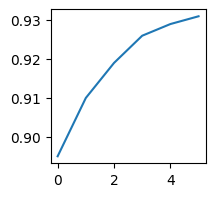

In [ ]:
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
plt.figure(figsize=(2,2))
plt.plot(yield_apples)

Text(0.5, 0, 'yield (tons per hectare)')

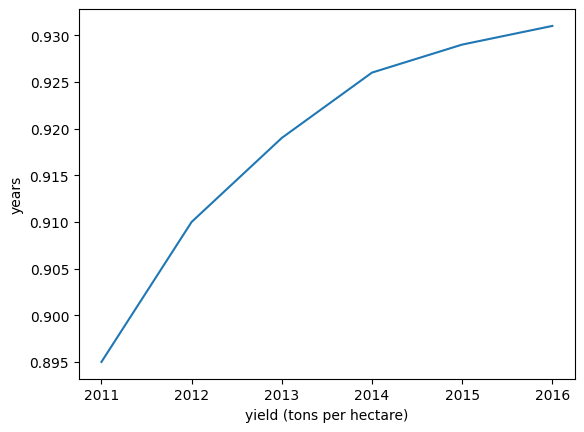

In [ ]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
plt.plot(years, yield_apples)
plt.ylabel('years')
plt.xlabel('yield (tons per hectare)')